In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:

import numpy
import pandas
print('numpy version:', numpy.__version__)
print('pandas version:', pandas.__version__)

numpy version: 2.2.4
pandas version: 2.2.3


In [3]:
import pandas as pd

#Create a DataFrame

marketing = pd.read_csv('marketing.csv', delimiter=',')

Exibindo dados do DataFrame Marking

In [4]:
print(marketing.head(5)) # Exibir todos os dados da Colunas 

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [5]:
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

In [6]:
marketing.info

<bound method DataFrame.info of           user_id date_served marketing_channel          variant converted  \
0      a100000029      1/1/18         House Ads  personalization      True   
1      a100000030      1/1/18         House Ads  personalization      True   
2      a100000031      1/1/18         House Ads  personalization      True   
3      a100000032      1/1/18         House Ads  personalization      True   
4      a100000033      1/1/18         House Ads  personalization      True   
...           ...         ...               ...              ...       ...   
10032  a100007290     1/17/18             Email          control      True   
10033  a100007291     1/17/18             Email          control      True   
10034  a100007292      1/5/18         Instagram          control     False   
10035  a100007293     1/17/18             Email          control      True   
10036  a100007294      1/6/18          Facebook          control     False   

      language_displayed langua

3. Tipos de dados e mesclagem

In [7]:
#print a data type os a  single colunn
#imprimir um tipo de dados em uma única coluna
marketing['converted'].head(5)


0    True
1    True
2    True
3    True
4    True
Name: converted, dtype: object

In [8]:
# Exinbindo as alterações que estamos fazendo logo a baixo 
marketing['converted'].dtype

dtype('O')

In [9]:
marketing['converted'].astype('bool') # mostrando o que esta sendo exibido antes de fazer a autereção de object para boliano

0         True
1         True
2         True
3         True
4         True
         ...  
10032     True
10033     True
10034    False
10035     True
10036    False
Name: converted, Length: 10037, dtype: bool

In [10]:
marketing['converted'] = marketing['converted'].astype('bool') 
# EXECUÇÃO PARA A CONVERSÃO E ARMAZENAMENTO DA CONVERSÃO DE OBJECT PARA BOLLIANO

In [11]:
%pip install numpy  # instalação do numpy 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [12]:
import numpy
print('numpy version:', numpy.__version__)

numpy version: 2.2.4


In [13]:
import numpy as np
np.where(marketing['marketing_channel']) == 'House Ads', True, False

(False, True, False)

In [14]:
marketing['is_house_ads'] = np.where(marketing['marketing_channel'] == 'house ads', True, False)
print(marketing.is_house_ads.head(3))

0    False
1    False
2    False
Name: is_house_ads, dtype: bool


In [15]:
# acho que o codigo abaixo esta incompleto por isso estou copiando novamento o codigo do pdf aula 3
channel_dict = {
    'House Ads': 1,
    'Instagram': 2,
    "Facebook": 3,
    'Email': 4,
    'Push': 5,
    '': 0

}
marketing["channel_code"] = marketing["marketing_channel"].map(channel_dict)

print(marketing["channel_code"].head(3))

0    1.0
1    1.0
2    1.0
Name: channel_code, dtype: float64


In [16]:
print(marketing.columns)

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'is_house_ads', 'channel_code'],
      dtype='object')


In [17]:
channel_dict = {
    'House Ads': 1,
    'Instagram': 2,
    "Facebook": 3,
    'Email': 4,
    'Push': 5,
    '': 0

}
# set na values to default
# definir valores na para o padrão
marketing['marketing_channel'].fillna('').map(channel_dict) # Outra forma de se fazer trabalhar com o campo vazio
#marketing['marketing_channel'].dropna().map(channel_dict)
#dropna() = para retirar os campos em brancos 

0        1
1        1
2        1
3        1
4        1
        ..
10032    4
10033    4
10034    2
10035    4
10036    3
Name: marketing_channel, Length: 10037, dtype: int64

In [18]:
print( marketing.columns)

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'is_house_ads', 'channel_code'],
      dtype='object')


Colunas do tipo Data

In [ ]:
# leia colunas de data usando parse_dates
marketing = pd.read_csv('marketing.csv',
                         parse_dates =['date_served',
                                        'date_subscribed',
                                          'date_canceled'])
marketing['date_served'] = pd.to_datetime(marketing['date_served'])

C:\Users\rafae\AppData\Local\Temp\ipykernel_7000\737993404.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv',
C:\Users\rafae\AppData\Local\Temp\ipykernel_7000\737993404.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv',
C:\Users\rafae\AppData\Local\Temp\ipykernel_7000\737993404.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv',


In [20]:
# OU converter coluna já existente em coluna de data e hora
marketing['date_served'] = pd.to_datetime(marketing ['date_served'])
marketing['day_served'] = marketing['date_served'].dt.day_of_week

Atulizando o tipo de dados de uma coluna 

In [21]:
#Veficando o tipo de dado da coluna is_retained
print(marketing['is_retained'].dtype)

object


In [22]:
#Converta is_retained para Booleano
marketing["is_retained"] = marketing['is_retained'].astype('bool')

Adicionando novas colunas

In [29]:
# Mapeamento para Canais
channel_dict = {"House Ads": 1, "Instagram": 2, 
"Facebook": 3, 
"Email": 4, 
"Push": 5}

# Mapear o canal para um codigo de canal
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [32]:
# Import numpy
import numpy as np
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 'Yes', 'No'
)

In [ ]:
# Aqui esta mosntrando as 5 primeira linhas
print(marketing['is_correct_lang'].head())

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: is_correct_lang, dtype: object


In [ ]:
# Aqui esta trazendo o total de YES e NO 
print(marketing['is_correct_lang'].value_counts())

is_correct_lang
Yes    9515
No      522
Name: count, dtype: int64


Colunas de Data 

In [49]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv with date columns
marketing = pd.read_csv("marketing.csv", parse_dates= ["date_served", "date_subscribed", "date_canceled"])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029  2018-01-01         House Ads  personalization      True   
1  a100000030  2018-01-01         House Ads  personalization      True   
2  a100000031  2018-01-01         House Ads  personalization      True   
3  a100000032  2018-01-01         House Ads  personalization      True   
4  a100000033  2018-01-01         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel is_retained  DoW  
0           NaT           House Ads        True  0.0  
1           

C:\Users\rafae\AppData\Local\Temp\ipykernel_7000\1210974707.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv("marketing.csv", parse_dates= ["date_served", "date_subscribed", "date_canceled"])
C:\Users\rafae\AppData\Local\Temp\ipykernel_7000\1210974707.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv("marketing.csv", parse_dates= ["date_served", "date_subscribed", "date_canceled"])
C:\Users\rafae\AppData\Local\Temp\ipykernel_7000\1210974707.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv("marke

3. Análise exploratória inicial

In [56]:
# Aggregate unique users taht see ads by date
# Agregar usuários únicos que veem anúncios por data

daily_users = marketing.groupby (['date_served']) ['user_id'].nunique()

print(daily_users)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


Visualização dos resultados

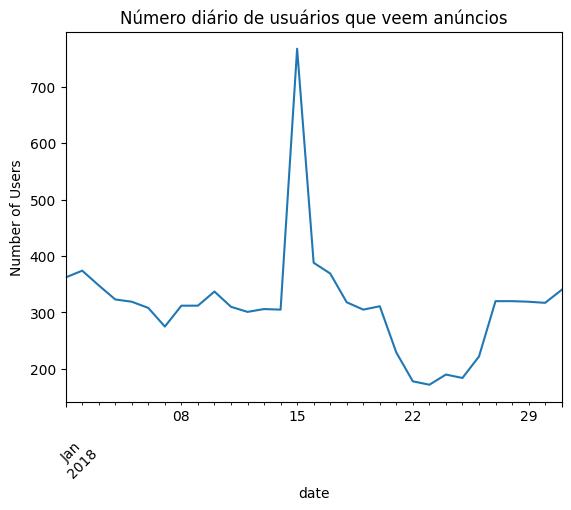

In [57]:
import matplotlib.pyplot as plt

# Plot
daily_users.plot()

# Annotate

plt.title('Número diário de usuários que veem anúncios')
plt.xlabel('date')
plt.ylabel("Number of Users")
plt.xticks(rotation = 45)
plt.show()


Alcance diário de marketing por canal

In [67]:
# Agrupar por data de atendimento e contar o número de IDs de usuários exclusivos

daily_users= marketing.groupby(['date_served']) ['user_id'].nunique()

# Cabeçalho de impressão de daily_users
print(daily_users.head)

<bound method NDFrame.head of date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64>


Visualizando o alcance diário de marketing

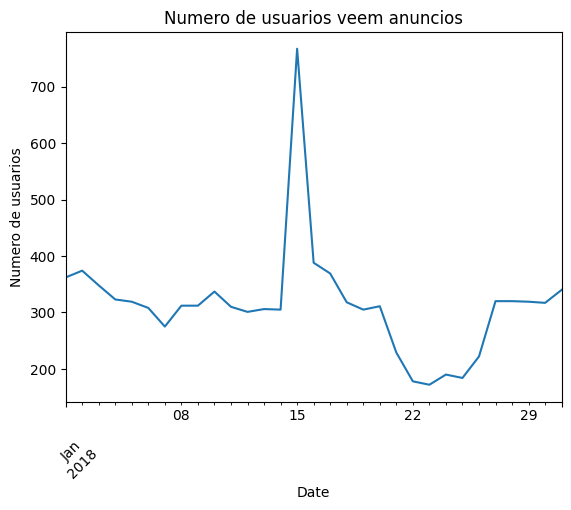

In [68]:
import matplotlib.pyplot as plt

daily_users.plot()

plt.title("Numero de usuarios veem anuncios")
plt.xlabel('Date')
plt.ylabel("Numero de usuarios")
plt.xticks(rotation = 45)
plt.show()